In [1]:
import os
os.chdir('/home/hugo-dev/esirem-dev/4a/kmutt/kmutt_v2')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from utils.load_data import load_data_with_mapping

In [3]:
DATA_PATH = "./data/data_25ms_h=50%_16mfcc.json"

In [4]:
X, y, mapping = load_data_with_mapping(DATA_PATH)

print(X.shape)
print(y.shape)

Training sets loaded!
(560121, 1, 16)
(560121,)


In [5]:
# plot Total Segments for each class
def plot_segments(y, mapping):
    plt.figure(figsize=(10, 5))
    values, counts = np.unique(y, return_counts=True)
    plt.bar([mapping[val] for val in values], counts)
    plt.xlabel('Classes')
    plt.ylabel('Total Segments')
    plt.title('Total Segments for each class')

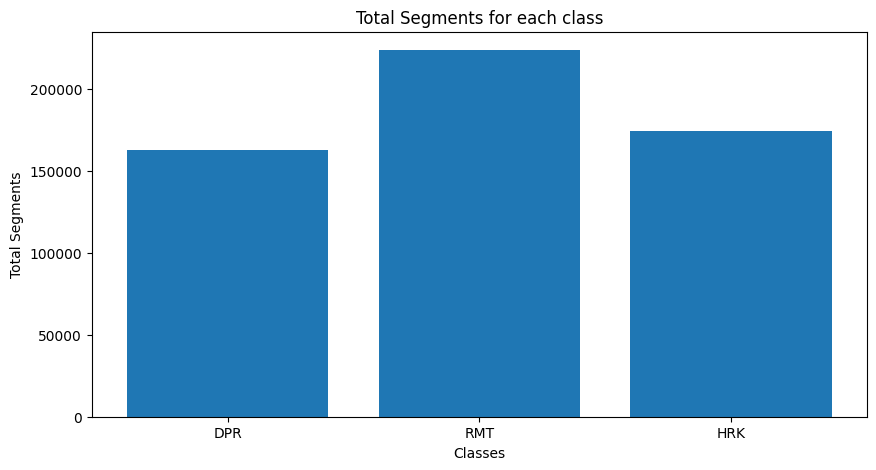

In [6]:
plot_segments(y, mapping)

In [7]:
# plot the PCA
def plot_pca(X, y, mapping):
    X_reshaped = X.reshape(X.shape[0], -1)
    plt.figure(figsize=(8,6))

    for cls in range(len(mapping)):
        cls_data = X_reshaped[y == cls]

        pca = PCA(n_components=2)
        data_pca = pca.fit_transform(cls_data)

        plt.scatter(data_pca[:,0], data_pca[:,1], alpha=0.5, label=mapping[cls])

    plt.xlabel('First componant')
    plt.ylabel('Second componant')
    plt.legend()

In [11]:
# plot_pca(X, y, mapping)

In [9]:
# import plotly.graph_objects as go

# X = X.tolist()
# y = y.tolist()
# mapping = mapping.tolist()

# # Créer des listes pour chaque classe
# DPR = [X[i] for i in range(len(X)) if y[i] == mapping.index('DPR')]
# HRK = [X[i] for i in range(len(X)) if y[i] == mapping.index('HRK')]
# RMT = [X[i] for i in range(len(X)) if y[i] == mapping.index('RMT')]


In [10]:
# # Créer une figure 3D
# fig = go.Figure()

# # Ajouter les données dans le graphique
# for color, label in [('red', 'DPR'), ('blue', 'HRK'), ('green', 'RMT')]:
#     if label == 'DPR':
#         xs = [coef[0] for coef in DPR]
#         ys = [coef[1] for coef in DPR]
#         zs = [coef[2] for coef in DPR]
#     elif label == 'HRK':
#         xs = [coef[0] for coef in HRK]
#         ys = [coef[1] for coef in HRK]
#         zs = [coef[2] for coef in HRK]
#     else:
#         xs = [coef[0] for coef in RMT]
#         ys = [coef[1] for coef in RMT]
#         zs = [coef[2] for coef in RMT]
#     fig.add_trace(go.Scatter3d(x=xs, y=ys, z=zs, mode='markers', marker=dict(size=3, color=color), name=label))

# # Obtenir toutes les valeurs de MFCC dans une liste
# all_mfcc = [coef for class_data in [DPR, HRK, RMT] for coef in class_data]

# # Obtenir les valeurs min et max pour chaque coefficient
# min_x = min(coef[0] for coef in all_mfcc)
# max_x = max(coef[0] for coef in all_mfcc)

# min_y = min(coef[1] for coef in all_mfcc)
# max_y = max(coef[1] for coef in all_mfcc)

# min_z = min(coef[2] for coef in all_mfcc)
# max_z = max(coef[2] for coef in all_mfcc)

# fig.update_layout(
#     scene=dict(
#         xaxis=dict(range=[min_x, max_x]),  # Remplacez par vos valeurs min et max pour l'axe X
#         yaxis=dict(range=[min_y, max_y]),  # Remplacez par vos valeurs min et max pour l'axe Y
#         zaxis=dict(range=[min_z, max_z])   # Remplacez par vos valeurs min et max pour l'axe Z
#     )
# )


# # Afficher le graphique
# fig.show()